In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
#EXP4. Comparing it with COVID-19 specific repos

In [26]:
df = pd.read_csv('Covid-19 repo.csv')
df.head()

,1,Adds,Subs,Date
0,1581206400,13549,-10213,09/02/2020
1,1581811200,8296,-7308,16/02/2020
2,1582416000,7530,-4554,23/02/2020
3,1583020800,11295,-12380,01/03/2020
4,1583625600,20046,-17739,08/03/2020


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       99 non-null     int64 
 1   Adds    99 non-null     int64 
 2   Subs    99 non-null     int64 
 3   Date    99 non-null     object
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [28]:
df['Date']=pd.to_datetime(df['Date'])
print(df)
print()
print(df.dtypes)

             1     Adds     Subs       Date
0   1581206400    13549   -10213 2020-09-02
1   1581811200     8296    -7308 2020-02-16
2   1582416000     7530    -4554 2020-02-23
3   1583020800    11295   -12380 2020-01-03
4   1583625600    20046   -17739 2020-08-03
..         ...      ...      ...        ...
94  1638057600    96538   -67748 2021-11-28
95  1638662400  1104891 -1076314 2021-05-12
96  1639267200    86152   -57608 2021-12-12
97  1639872000   147424  -118906 2021-12-19
98  1640476800   119662   -91189 2021-12-26

[99 rows x 4 columns]

1                int64
Adds             int64
Subs             int64
Date    datetime64[ns]
dtype: object


C:\Users\Jahnavi Jaitly\AppData\Local\Temp\ipykernel_23704\1437625883.py:1: UserWarning: Parsing '16/02/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\Jahnavi Jaitly\AppData\Local\Temp\ipykernel_23704\1437625883.py:1: UserWarning: Parsing '23/02/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\Jahnavi Jaitly\AppData\Local\Temp\ipykernel_23704\1437625883.py:1: UserWarning: Parsing '15/03/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\Jahnavi Jaitly\AppData\Local\Temp\ipykernel_23704\1437625883.py:1: UserWarning: Parsing '22/03/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\U

In [29]:
sum_of_cols=df.sum(axis=0)
print(sum_of_cols)

1       159473318400
Adds        10854458
Subs        -8202426
dtype: int64


C:\Users\Jahnavi Jaitly\AppData\Local\Temp\ipykernel_23704\295290147.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_of_cols=df.sum(axis=0)


In [30]:
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import datetime
from datetime import datetime,timedelta
#from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [31]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d %I-%p')

In [32]:
df['Date']

0    2020-09-02
1    2020-02-16
2    2020-02-23
3    2020-01-03
4    2020-08-03
        ...    
94   2021-11-28
95   2021-05-12
96   2021-12-12
97   2021-12-19
98   2021-12-26
Name: Date, Length: 99, dtype: datetime64[ns]

In [33]:
commit_date= df['Date']
Adds_repo= df['Adds']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

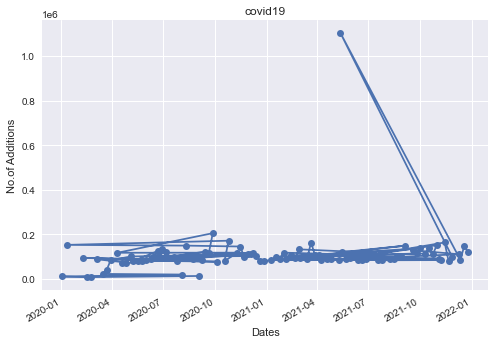

In [34]:
plt.style.use('seaborn')
plt.plot_date(commit_date,Adds_repo,linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('covid19')
plt.xlabel('Dates')
plt.ylabel('No.of Additions')
plt.tight_layout

In [13]:
df = pd.read_csv('who.csv')
df.head()

,Weeks,Adds,Subs,Year,Date
0,1601164800,17712,-14464,2020,2020-09-27
1,1601769600,15950,-15942,2020,2020-10-04
2,1602374400,10878,-10878,2020,2020-10-11
3,1602979200,10848,-10847,2020,2020-10-18
4,1603584000,21532,-21531,2020,2020-10-25


In [14]:
sum_of_cols=df.sum(axis=0)
print(sum_of_cols)

Weeks                                         128355408000
Adds                                               1759972
Subs                                              -1753021
Year                                                159658
Date     2020-09-272020-10-042020-10-112020-10-182020-1...
dtype: object


In [15]:
Adds_by_year_who = df.groupby(['Adds'])['Year'].sum().reset_index().sort_values('Adds', ascending=False)
Adds_by_year_who.head(10)

,Adds,Year
78,31232,2020
77,30608,2020
76,30110,2020
75,29733,2020
74,29645,2020
73,29474,2020
72,29196,2020
71,27544,2021
70,27522,2021
69,27490,2021


Text(0.5, 0, 'Year')

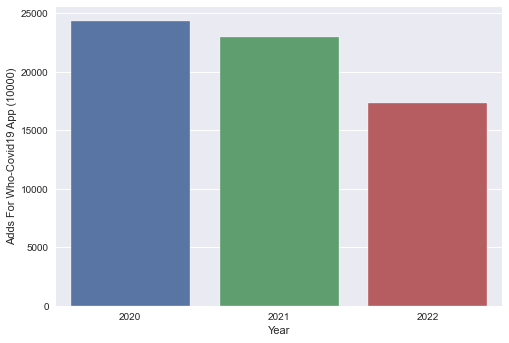

In [17]:
plot_annual_pr = sns.barplot(data=Adds_by_year_who.query('Year < 2023 & Year > 2018'),x='Year',y='Adds',ci=None)
plot_annual_pr.set_ylabel('Adds For Who-Covid19 App (10000)')
plot_annual_pr.set_xlabel('Year')

In [18]:
df['Date']=pd.to_datetime(df['Date'])
print(df)
print()
print(df.dtypes)

         Weeks   Adds   Subs  Year       Date
0   1601164800  17712 -14464  2020 2020-09-27
1   1601769600  15950 -15942  2020 2020-10-04
2   1602374400  10878 -10878  2020 2020-10-11
3   1602979200  10848 -10847  2020 2020-10-18
4   1603584000  21532 -21531  2020 2020-10-25
..         ...    ...    ...   ...        ...
74  1645920000  17783 -17783  2022 2022-02-27
75  1646524800  18352 -18351  2022 2022-03-06
76  1647129600  17892 -17892  2022 2022-03-13
77  1647734400  17418 -17418  2022 2022-03-20
78  1648339200   2994  -2994  2022 2022-03-27

[79 rows x 5 columns]

Weeks             int64
Adds              int64
Subs              int64
Year              int64
Date     datetime64[ns]
dtype: object


In [22]:
commit_date_who= df['Date']
Adds_repo_who= df['Adds']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

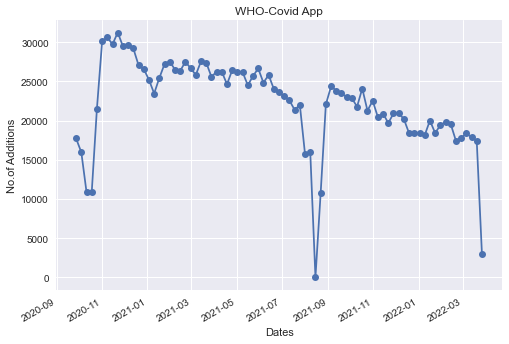

In [20]:
plt.style.use('seaborn')
plt.plot_date(commit_date_who,Adds_repo_who,linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('WHO-Covid App')
plt.xlabel('Dates')
plt.ylabel('No.of Additions')
plt.tight_layout

In [42]:
df = pd.read_csv('resultindia.csv')
df.head()

,Weeks,Adds,Subs,Year,Date
0,1584230400,382759,-8594,2020,2020-03-15
1,1584835200,21688,-369099,2020,2020-03-22
2,1585440000,206840,-80742,2020,2020-03-29
3,1586044800,16767,-42463,2020,2020-04-05
4,1586649600,149852,-143565,2020,2020-04-12


In [43]:
sum_of_cols=df.sum(axis=0)
print(sum_of_cols)

Weeks                                         176240966400
Adds                                               1090087
Subs                                               -826461
Year                                                220262
Date     2020-03-152020-03-222020-03-292020-04-052020-0...
dtype: object


In [44]:
Adds_by_year_new = df.groupby(['Adds'])['Year'].sum().reset_index().sort_values('Adds', ascending=False)
Adds_by_year_new.head(10)

,Adds,Year
45,382759,2020
44,206840,2020
43,149852,2020
42,129052,2020
41,44001,2020
40,37917,2020
39,24430,2021
38,21688,2020
37,16767,2020
36,15511,2021


Text(0.5, 0, 'Year')

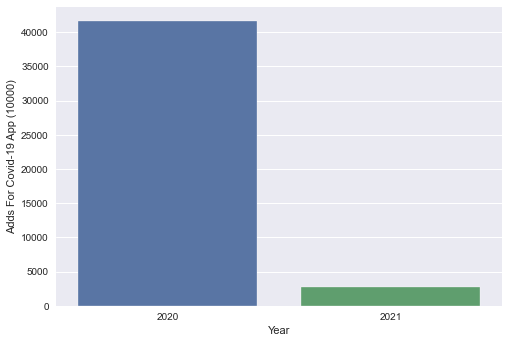

In [45]:
plot_annual_pr = sns.barplot(data=Adds_by_year_new.query('Year < 2023 & Year > 2018'),x='Year',y='Adds',ci=None)
plot_annual_pr.set_ylabel('Adds For Covid-19 App (10000)')
plot_annual_pr.set_xlabel('Year')

In [46]:
df['Date']=pd.to_datetime(df['Date'])
print(df)
print()
print(df.dtypes)

          Weeks    Adds    Subs  Year       Date
0    1584230400  382759   -8594  2020 2020-03-15
1    1584835200   21688 -369099  2020 2020-03-22
2    1585440000  206840  -80742  2020 2020-03-29
3    1586044800   16767  -42463  2020 2020-04-05
4    1586649600  149852 -143565  2020 2020-04-12
..          ...     ...     ...   ...        ...
104  1647129600       0       0  2022 2022-03-13
105  1647734400       0       0  2022 2022-03-20
106  1648339200       0       0  2022 2022-03-27
107  1648944000       0       0  2022 2022-04-03
108  1649548800       0       0  2022 2022-04-10

[109 rows x 5 columns]

Weeks             int64
Adds              int64
Subs              int64
Year              int64
Date     datetime64[ns]
dtype: object


In [47]:
commit_date_new= df['Date']
Adds_repo_new= df['Adds']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

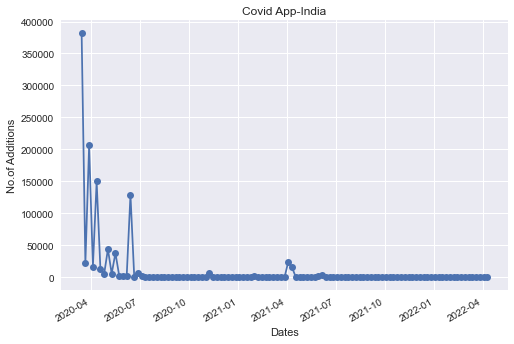

In [49]:
plt.style.use('seaborn')
plt.plot_date(commit_date_new,Adds_repo_new,linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Covid App-India')
plt.xlabel('Dates')
plt.ylabel('No.of Additions')
plt.tight_layout